,Frequency,Angle of attack,Chord length,Free stream velocity,SS Displacement thickness,Sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


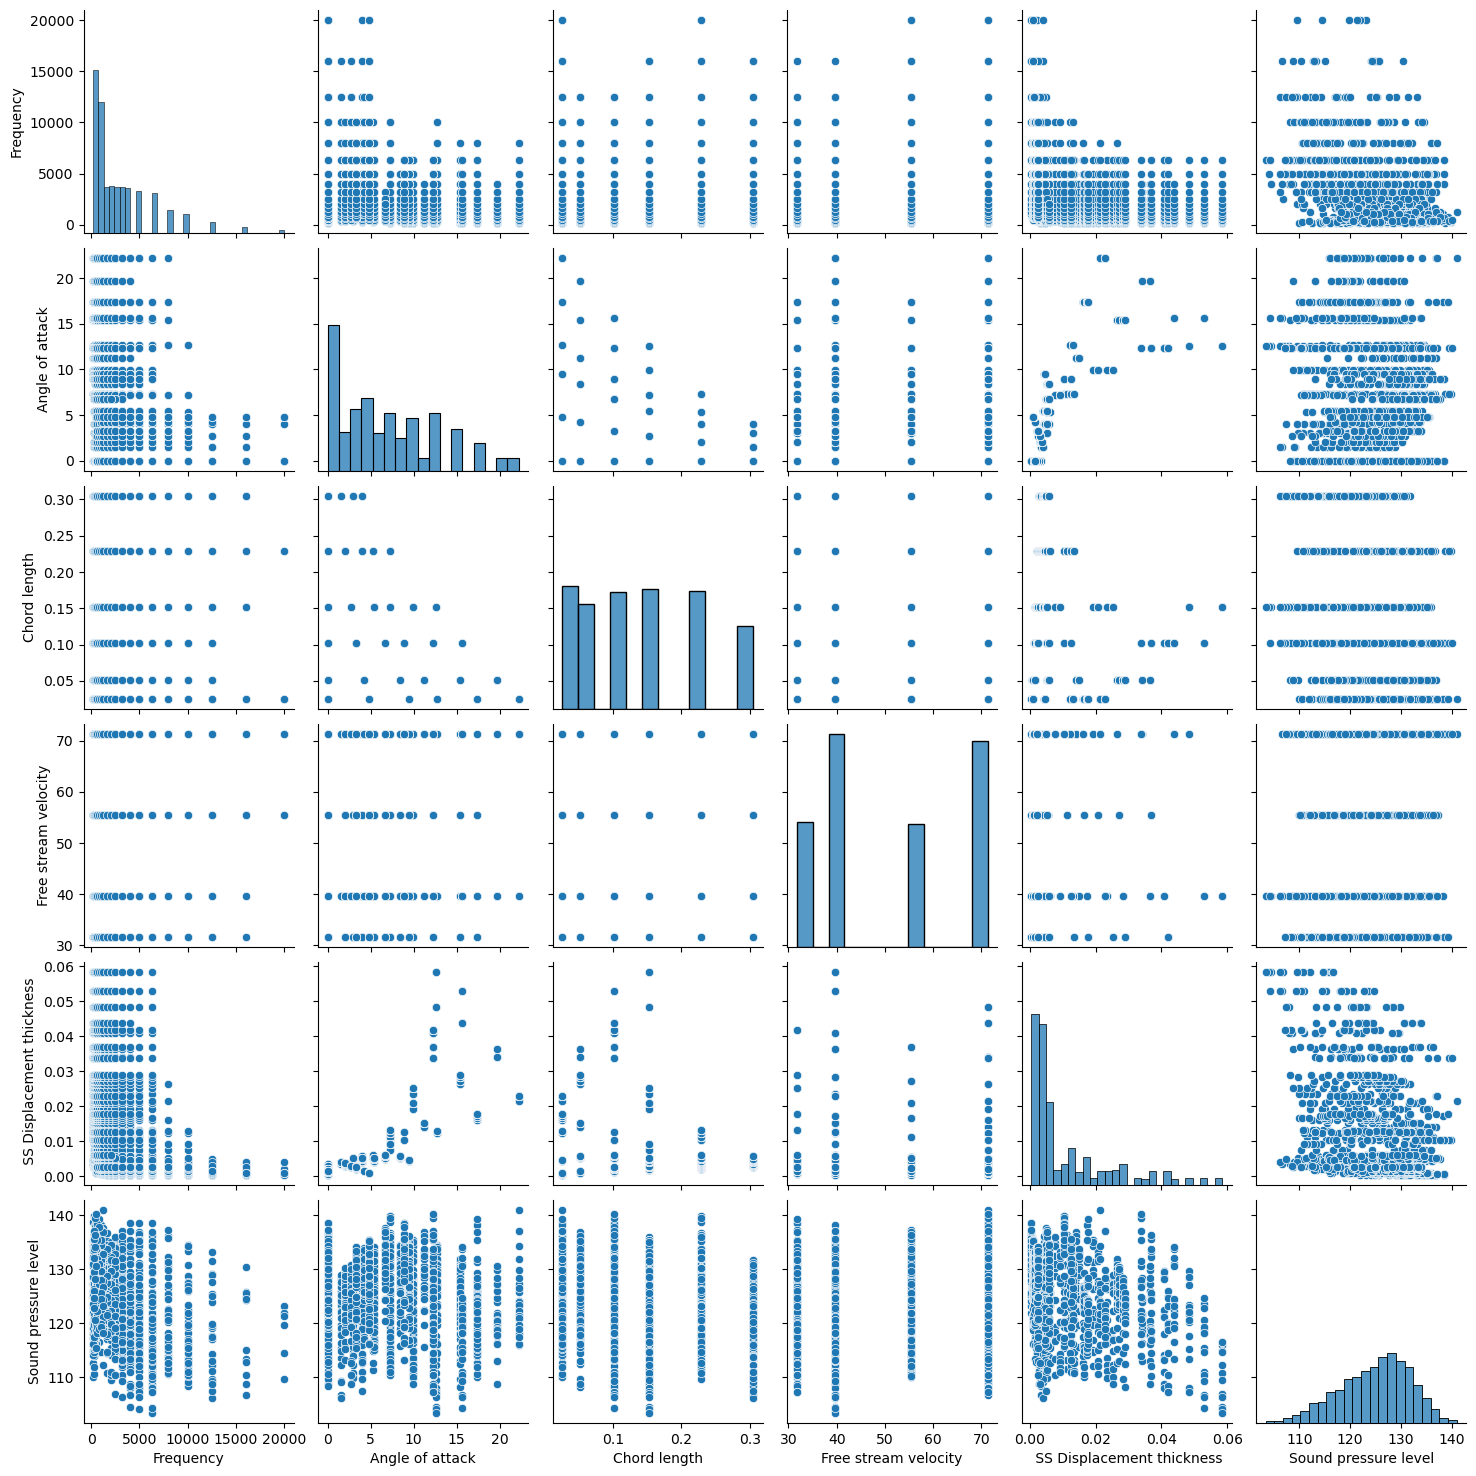

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# data = np.genfromtxt('airfoil_self_noise.dat')
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
data = pd.read_csv(data, sep='\t', header=None, names=['Frequency', 'Angle of attack', 'Chord length', 
                                                       'Free stream velocity', ' SS Displacement thickness', 
                                                       'Sound pressure level'])

display(data)
sns.pairplot(data)

In [2]:
X = data.iloc[:, 0:5]
y = data.iloc[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1052, 5)
(451, 5)
(1052,)
(451,)


In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# R-squared value
print('R-squared value: ', r2_score(y_test, y_pred))

# Mean squared error
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred, squared=False))

# Root mean squared error
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

# Mean absolute error
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

R-squared value:  0.5174147394252251
Mean Squared Error:  4.938623516089779
Root Mean Squared Error:  2.22230140082073
Mean Absolute Error:  3.9194257606187


Based on the model results, the machine learning model proposed is a good for the NASA airfoil data. The mean absolute error indicates that on average the values the model predicts is within 3.9194 dB of the actual sound pressure value. The mean square error indicates that there is some variability but not large. The root mean square inidcates that the predictions are within the range of 2.222 dB of actual value. 

Analytical solutions are solved by framing the problem in a well understood form and calculating an exact solution. This is difficult to do and machine learning models are great for handling complex and multi-dimensional data. Machine learning modles are better at predicting values and generally have higher accuracy for both linear and non-linear systems. Machine learning models are also good for catching patterns and making connections that analytical solutions are not capable of identifying.